In [25]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

Using a Perceptron:

In [4]:
iris_data = load_iris()
X = iris_data.data[:,(2,3)]
y = (iris_data.target == 0).astype(int)

In [5]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [6]:
y_pred = per_clf.predict([[1.8, 0.1]])
y_pred

array([1])

Getting started with tensorflow and keras:

In [2]:
print('tersorflow:', tf.__version__)
print('keras:', keras.__version__)

tersorflow: 2.10.1
keras: 2.10.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_total, y_train_total), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train_total.shape)
print(X_train_total.dtype)

(60000, 28, 28)
uint8


In [5]:
X_train, X_cv = X_train_total[5000:]/255.0, X_train_total[:5000]/255.0
y_train, y_cv = y_train_total[5000:], y_train_total[:5000]
X_test = X_test/255.0

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n = len(class_names)
print(n)

10


In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()

In [13]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(n, activation='softmax'))

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(n, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [19]:
model.layers[0].name

'flatten_2'

In [20]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.05946832,  0.05352992,  0.00864694, ..., -0.02952186,
         0.02341267, -0.06438229],
       [-0.02262481, -0.0468006 , -0.06719397, ...,  0.00913391,
        -0.0425802 ,  0.05324456],
       [-0.00119784,  0.07082665,  0.00261413, ..., -0.03900797,
        -0.04920628, -0.02169086],
       ...,
       [-0.00511118,  0.04504246,  0.06490533, ..., -0.06484231,
         0.06271912,  0.04724415],
       [-0.02978542, -0.06200171, -0.01937933, ..., -0.03373882,
         0.01211893, -0.00563216],
       [ 0.04409795, -0.0480351 , -0.06732248, ...,  0.05908045,
        -0.02954669, -0.02219   ]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7251 - accuracy: 0.7639 - val_loss: 0.5086 - val_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4889 - accuracy: 0.8293 - val_loss: 0.4546 - val_accuracy: 0.8394
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4439 - accuracy: 0.8437 - val_loss: 0.4294 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4157 - accuracy: 0.8538 - val_loss: 0.3852 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3954 - accuracy: 0.8602 - val_loss: 0.3835 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3805 - accuracy: 0.8651 - val_loss: 0.3662 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3672 - accuracy: 0.8707 - val_loss: 0.3591 - val_accuracy:

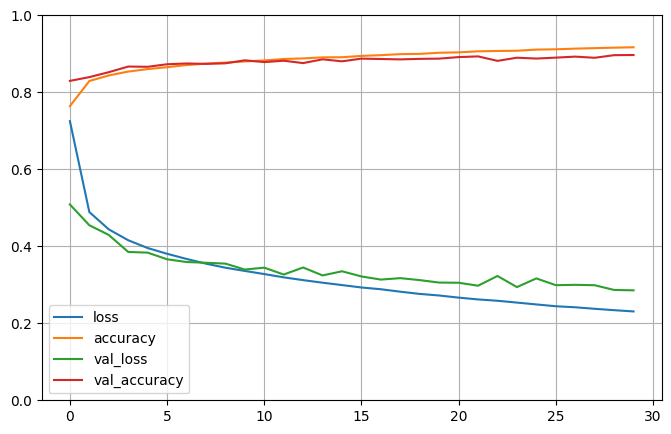

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3251 - accuracy: 0.8833


[0.3250616490840912, 0.8833000063896179]

In [29]:
X_new = X_test[:5]

In [31]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 132ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.14, 0.  , 0.01, 0.  , 0.  , 0.  , 0.85, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [35]:
y_pred == y_test[:5]

array([ True,  True,  True,  True,  True])